In [187]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt

In [188]:
#Define constants of cost storage function
C = 5
K1 = 5

#Function Cost storage based on units
def cost_storage(qt, st):
  n = qt - st

  if(n <= 0): return 0
  return C*n + K1

In [189]:
#Define onstants of penalization function
D = 35
K2 = 5

#Penalization cost function
def penalization_cost(qt, st):
  n = st - qt

  if(n <= 0): return 0
  return D*n + K2

In [190]:
from scipy.stats import norm

In [191]:
#Density funciton
from scipy.stats import norm

SIGMA = 10

def f_density(x, mu):  
    aux = norm.pdf(x, mu, SIGMA)
    return aux

In [192]:
#Constants
step = 1

#Loss function
def f_loss(qt,st):
    loss = 0

    #first integral
    rng = np.arange(st, qt+step, step)
    for i in rng:
        loss += cost_storage(i,st)*f_density(i,qt)

    #second integral
    rng2 = np.arange(0, st+step, step)
    for i in rng2:
        loss += penalization_cost(qt,st)*f_density(i,qt)
    
    return loss

In [193]:
#Constants
step_s = 10

#Solve qt
def solve_qt_it(st,it):
    rng = np.arange(st, it, step_s)

    min_loss = np.inf
    min_qt = -1

    for i in rng:
        aux_loss = f_loss(i,st)
        if(aux_loss < min_loss):
            min_loss = aux_loss
            min_qt = i

    return min_qt

In [194]:
#Solve solution
def general_solution(v_it, v_st):
    v_qt = []
    for i in range(0, len(v_it)):
        v_qt.append(solve_qt_it(v_st[i], v_it[i]))
        #print("   ", i)
    
    return v_qt

In [195]:
#Test 1
df_train = pd.read_csv("train.csv")
df_train = df_train.sort_values(by = ["date"])

0


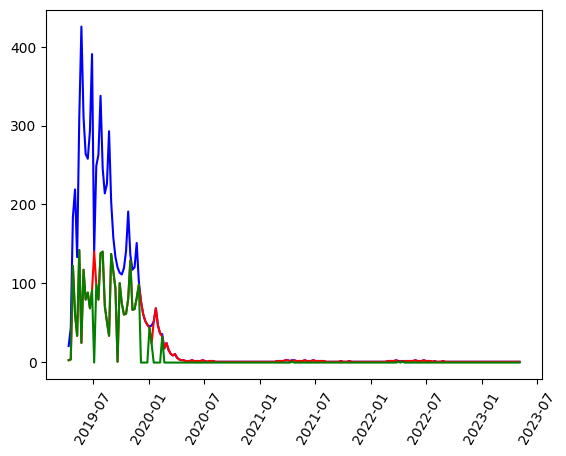

1


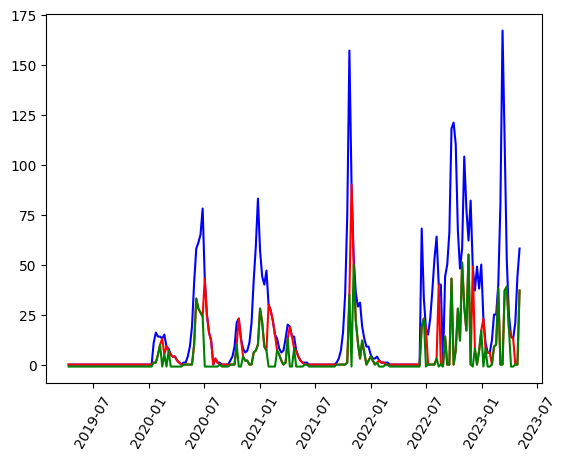

2


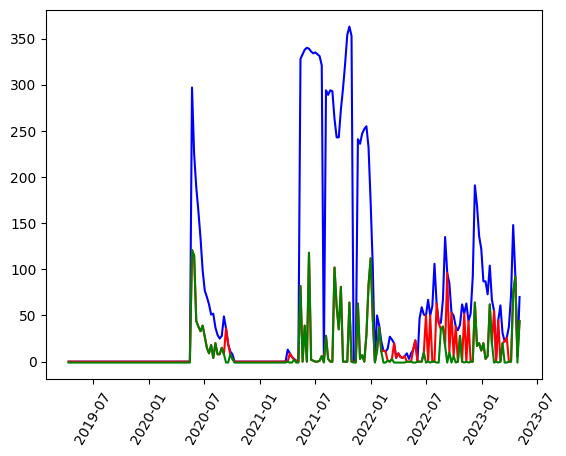

3


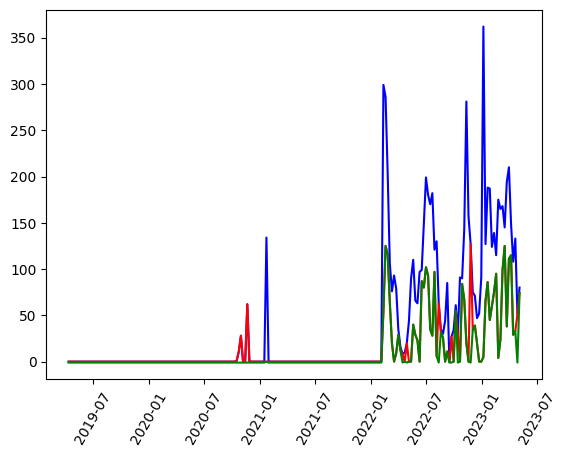

4


In [197]:
list_id = df_train["product_number"].unique()
list_da = df_train["date"].unique()
cont = 0


for p in list_id:
    x = []
    it = []
    st = []
    qt = []
    for d in list_da:
        val = df_train[(df_train['product_number']==p) & (df_train['date']==d)]['inventory_units'].sum()
        val2 = df_train[(df_train['product_number']==p) & (df_train['date']==d)]['sales_units'].sum()
        x.append(d)
        if(val2 > val):
            val2 = val
        it.append(val)
        st.append(val2)
        if(val == 0): 
            pr
    
    print(cont)
    qt = general_solution(it, st)
    cont += 1

    
    #print(res)
    x = np.asarray(x, dtype='datetime64[s]')
    plt.plot(x,it, color = 'blue')
    plt.plot(x,st, color = 'red')
    plt.plot(x, qt, color = 'green')
    plt.tick_params(axis='x', labelrotation=60)
    plt.show()

    if(cont == 10): break